In [ ]:
#한글폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#한글폰트
plt.rc('font', family='NanumBarunGothic')
sns.set(font="NanumBarunGothic")

#파일 불러오기
file_path = '/content/SUBWAY_202312_corrected.csv'
data = pd.read_csv(file_path)

data.head()


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20231201,2호선,대림(구로구청),25995,26770,20231204
1,20231201,2호선,신도림,55447,55057,20231204
2,20231201,2호선,문래,25818,26561,20231204
3,20231201,2호선,영등포구청,24517,25006,20231204
4,20231201,2호선,당산,20266,23832,20231204


# **전처리**

In [ ]:
# 사용일자20231225 제외 모든 열 제거
filtered_data = data[data['사용일자'] == 20231225]

filtered_data.head()


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
14669,20231225,6호선,역촌,2378,2690,20231228
14670,20231225,중앙선,상봉(시외버스터미널),3730,3962,20231228
14671,20231225,중앙선,중랑,3518,3406,20231228
14672,20231225,중앙선,회기,18278,17801,20231228
14673,20231225,장항선,신창(순천향대),1025,1131,20231228


In [ ]:
#노선명, 역명, 하차총승객수 제외 모든 칼럼 제거
reduced_data = filtered_data[['노선명', '역명', '하차총승객수']]
reduced_data.head()

,노선명,역명,하차총승객수
14669,6호선,역촌,2690
14670,중앙선,상봉(시외버스터미널),3962
14671,중앙선,중랑,3406
14672,중앙선,회기,17801
14673,장항선,신창(순천향대),1131


# **지하철 승하차데이터 분석방법1**



In [ ]:
# 하차총승객수 상위 10

sorted_data = reduced_data.sort_values(by='하차총승객수', ascending=False)

sorted_data.head(10)

,노선명,역명,하차총승객수
15185,2호선,홍대입구,99976
15208,2호선,잠실(송파구청),94853
15124,4호선,명동,62390
14906,경부선,영등포,45541
15213,2호선,성수,45157
15153,3호선,고속터미널,44858
14891,경부선,수원,44042
14909,경부선,용산,41974
15233,1호선,서울역,40839
15222,2호선,을지로입구,40402


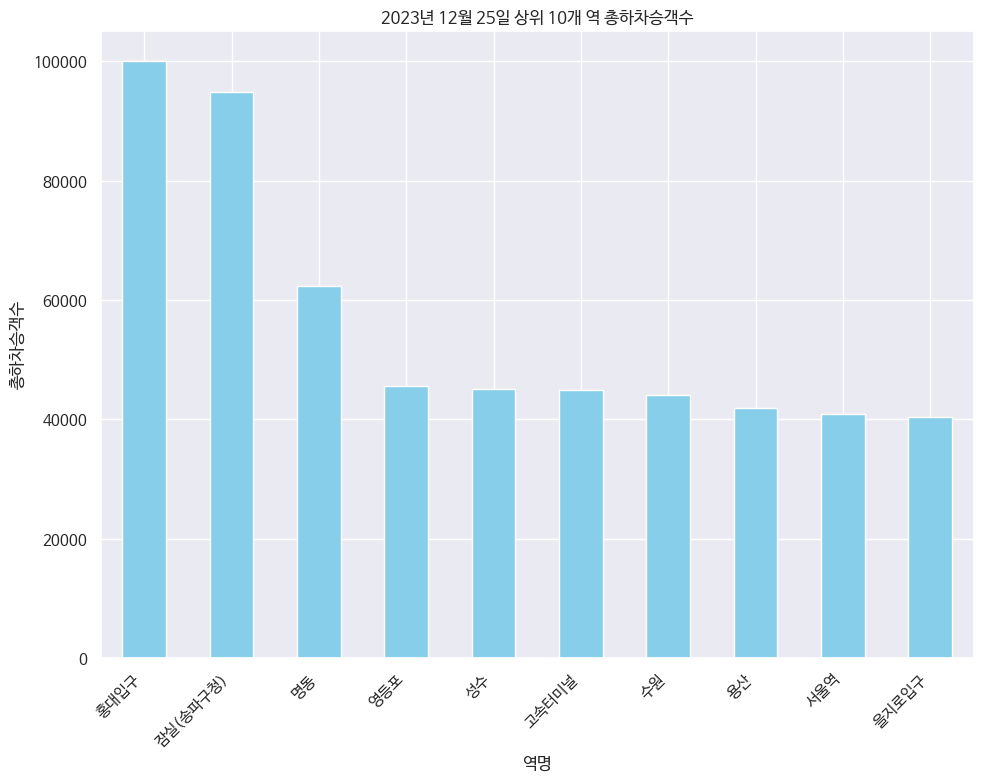

In [ ]:
# 지하철 하차총승객수 시각화
top_10_stations = sorted_data.head(10).set_index('역명')['하차총승객수']

# 그래프
plt.figure(figsize=(10, 8))
top_10_stations.plot(kind='bar', color='skyblue')
plt.title('2023년 12월 25일 상위 10개 역 총하차승객수')
plt.xlabel('역명')
plt.ylabel('총하차승객수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()



# **지하철 승하차데이터 분석방법2**

In [ ]:
# 각 노선별로 하차 승객 수가 많은 상위 3개 역 선정

# 노선별 하차 승객 수 합계 계산
station_passenger_counts = sorted_data.groupby(['노선명', '역명'])['하차총승객수'].sum().reset_index()

# 노선별로 하차 승객 수가 많은 상위 3개 역 선정
top_stations_per_line = station_passenger_counts.groupby('노선명').apply(lambda x: x.nlargest(3, '하차총승객수')).reset_index(drop=True)

top_stations_per_line


,노선명,역명,하차총승객수
0,1호선,서울역,40839
1,1호선,종각,19084
2,1호선,시청,18371
3,2호선,홍대입구,99976
4,2호선,잠실(송파구청),94853
...,...,...,...
76,장항선,아산,3280
77,장항선,쌍용(나사렛대),1560
78,중앙선,회기,17801
79,중앙선,구리,9305


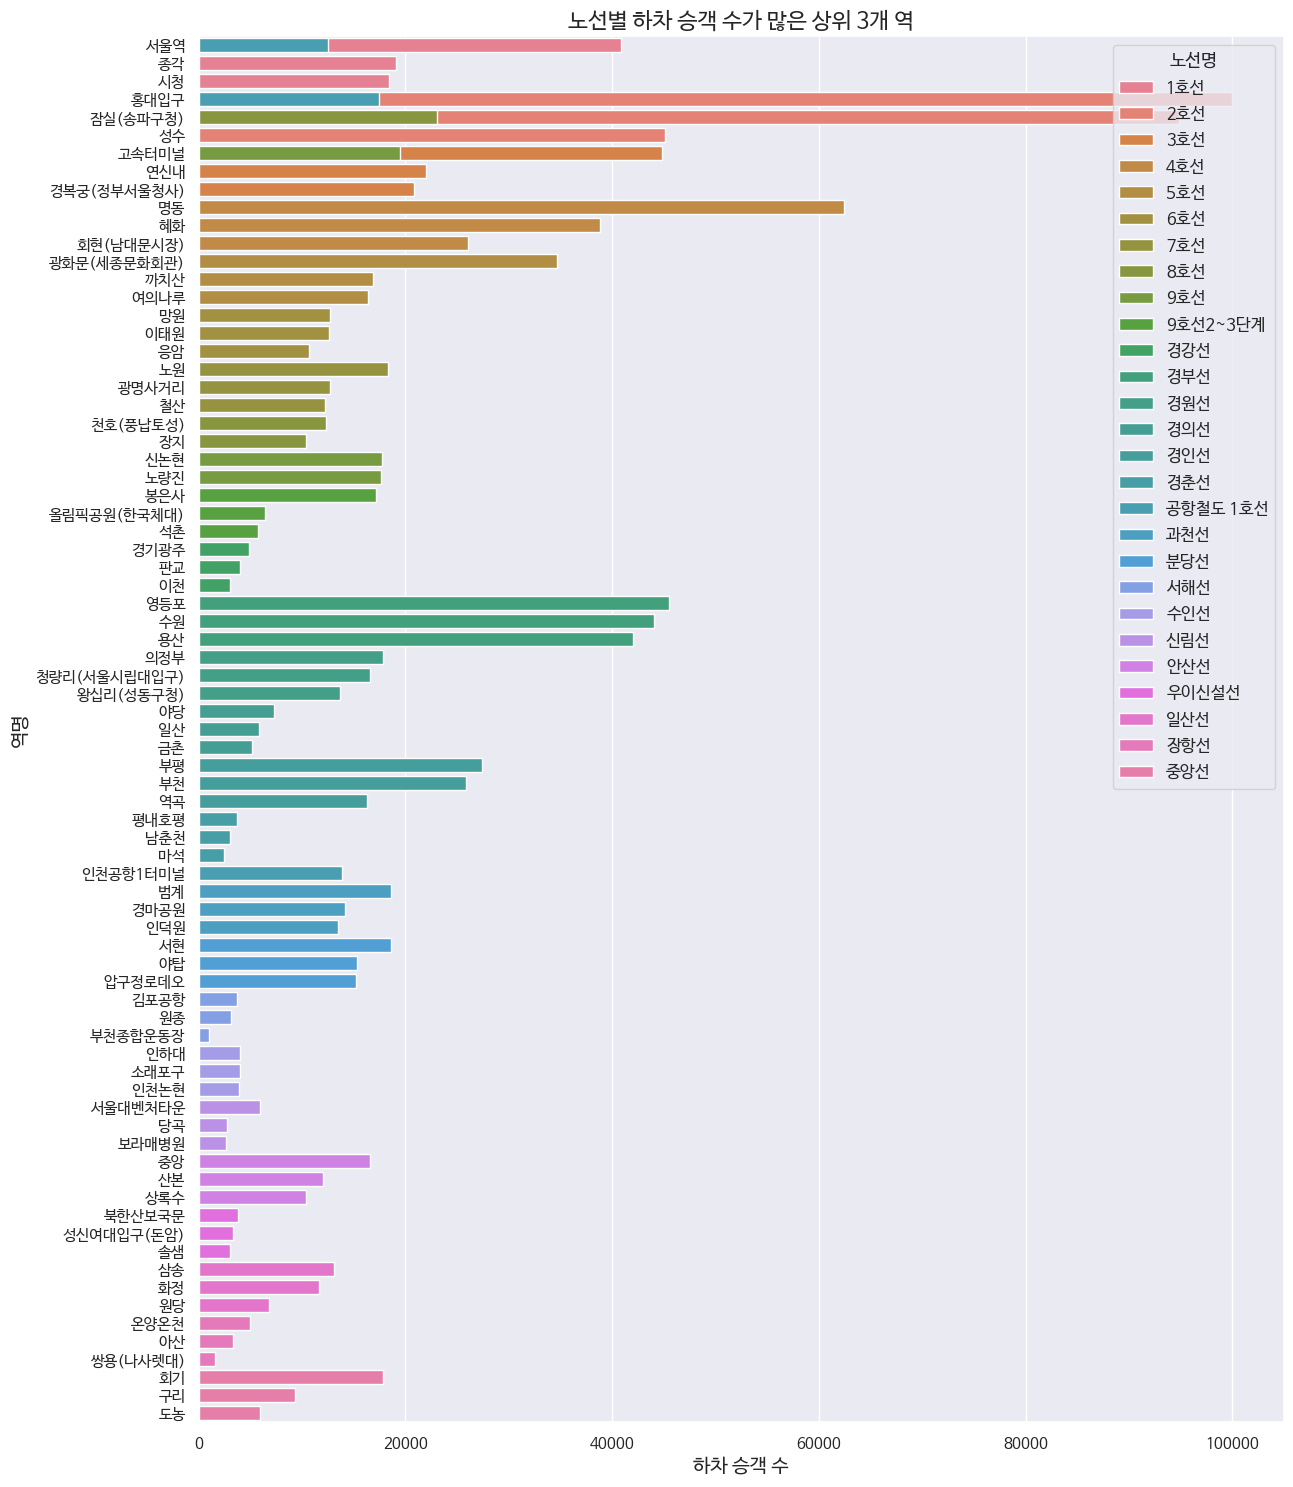

In [ ]:
# 시각화를 위한 설정
plt.figure(figsize=(14, 18))

# 각 노선별 상위 3개 역의 하차 승객 수 시각화
sns.barplot(x='하차총승객수', y='역명', hue='노선명', data=top_stations_per_line, dodge=False)

plt.title('노선별 하차 승객 수가 많은 상위 3개 역', fontsize=16)
plt.xlabel('하차 승객 수', fontsize=14)
plt.ylabel('역명', fontsize=14)
plt.legend(title='노선명', title_fontsize='13', fontsize='12', loc='upper right')

plt.show()